In [1]:
import tensorflow as tf
import numpy as np
from scipy.io import wavfile
from scipy.signal import spectrogram, stft, istft
import matplotlib.pyplot as plt
import librosa
import librosa.display
from misceallaneous import getWavFileAsNpArray, displaySpectrogram
from IPython.display import Audio

samplerate = 12000

In [2]:
clean = getWavFileAsNpArray("../dataset_2/clean/p1.wav")
vinyl = getWavFileAsNpArray("../dataset_2/white/p1.wav")

In [3]:
nperseg = 1024

c, t, Cxx = stft(np.array(clean), fs=samplerate, nperseg=nperseg)
d, u, Vxx = stft(np.array(vinyl), fs=samplerate, nperseg=nperseg)

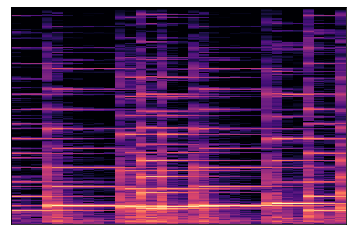

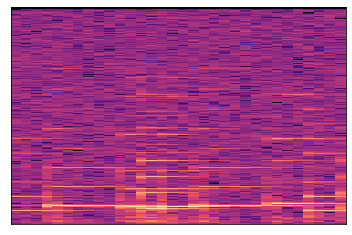

In [4]:
displaySpectrogram(Cxx[:, 32:64])
plt.show()
displaySpectrogram(Vxx[:, 32:64])
plt.show()

In [5]:
Cxx = Cxx[1:, :]
Vxx = Vxx[1:, :]
print(Cxx.shape, Vxx.shape)

(512, 21320) (512, 21320)


In [6]:
Cxx_split = []
Vxx_split = []

In [7]:
samples_length = 64
for i in range(0, Cxx.shape[1]-samples_length, samples_length):
    Cxx_split.append(np.reshape(np.array(Cxx[:, i:i+samples_length]), (Cxx.shape[0], samples_length, 1)))
    Vxx_split.append(np.reshape(np.array(Vxx[:, i:i+samples_length]), (Cxx.shape[0], samples_length, 1)))
Cxx_split = np.array(Cxx_split)
Vxx_split = np.array(Vxx_split)

In [8]:
print(Cxx_split.shape)

(333, 512, 64, 1)


In [9]:
Cxx_r = np.abs(Cxx_split)
Cxx_i = np.imag(Cxx_split)
Vxx_r = np.abs(Vxx_split)
Vxx_i = np.imag(Vxx_split)
print(Cxx_r.shape)

(333, 512, 64, 1)


In [11]:
ker1 = (16, 4)
ker2 = (1, 4)
def simple_autoencoder(input_shape, V_shape_1):
    print(input_shape)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(1, kernel_size = ker1,  activation = 'relu', input_shape = input_shape, padding='same', data_format='channels_last')) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 1)))
    
    model.add(tf.keras.layers.Conv2D(1, ker1, activation = 'relu', padding='same'))
    
    model.add(tf.keras.layers.Conv2D(1, ker1, activation = 'relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 1)))
    
    model.add(tf.keras.layers.Conv2D(1, ker1, activation = 'relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 1)))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(V_shape_1*V_shape_1/8, activation = 'relu'))
    model.add(tf.keras.layers.Dense(V_shape_1*V_shape_1, activation = 'relu'))
    
    model.add(tf.keras.layers.Reshape((V_shape_1, V_shape_1, 1)))
    
    model.add(tf.keras.layers.Conv2D(1, ker2, activation = 'relu', padding='same'))
    model.add(tf.keras.layers.UpSampling2D((2, 1)))
    
    model.add(tf.keras.layers.Conv2D(1, ker2, activation = 'relu', padding='same'))
    
    model.add(tf.keras.layers.Conv2D(1, ker2, activation = 'relu', padding='same'))
    model.add(tf.keras.layers.UpSampling2D((2, 1)))
    
    model.add(tf.keras.layers.Conv2D(1, ker2, activation = 'relu', padding='same'))
    model.add(tf.keras.layers.UpSampling2D((2, 1)))
    model.summary()
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model
model = simple_autoencoder((Cxx_r.shape[1], Cxx_r.shape[2], 1), Cxx_r.shape[2])

(512, 64, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 64, 1)        65        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 64, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 64, 1)        65        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 64, 1)        65        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 64, 1)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 64, 1)        65        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 6

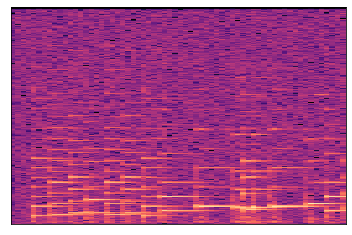

84/84 [==============================] - 16s 181ms/step - loss: 36598.3546 - accuracy: 0.0037


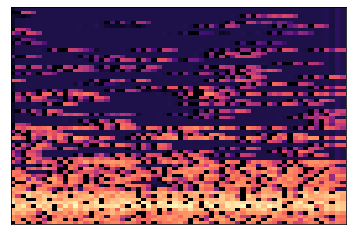

84/84 [==============================] - 15s 179ms/step - loss: 34485.8242 - accuracy: 0.0038


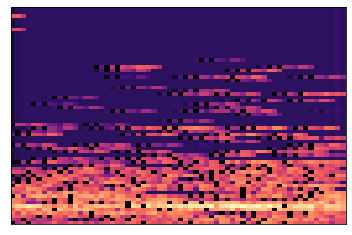

84/84 [==============================] - 16s 188ms/step - loss: 31552.9316 - accuracy: 7.1409e-04


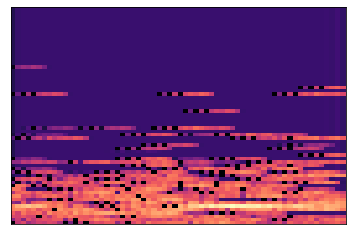

84/84 [==============================] - 16s 189ms/step - loss: 29327.4355 - accuracy: 1.7449e-04


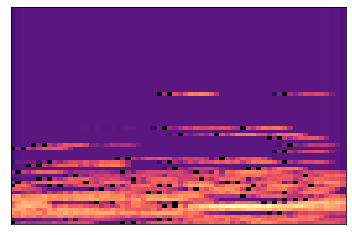

84/84 [==============================] - 16s 188ms/step - loss: 28059.5137 - accuracy: 1.0631e-04


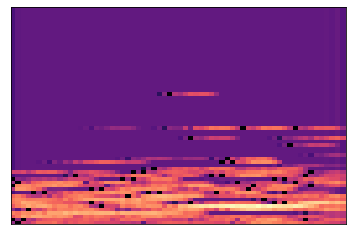

84/84 [==============================] - 16s 188ms/step - loss: 27180.1914 - accuracy: 8.2847e-05


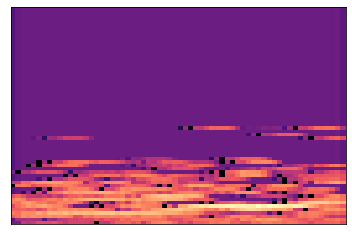

84/84 [==============================] - 16s 188ms/step - loss: 26575.5352 - accuracy: 6.5251e-05


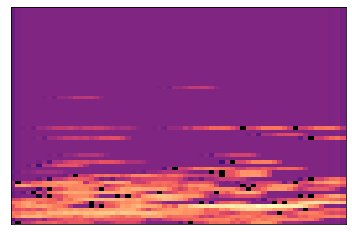

84/84 [==============================] - 16s 188ms/step - loss: 26182.4766 - accuracy: 4.3989e-05


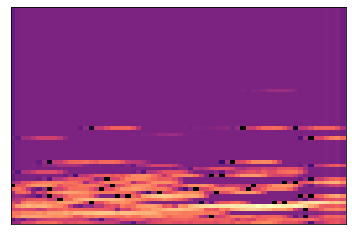

84/84 [==============================] - 16s 191ms/step - loss: 25962.4316 - accuracy: 2.7127e-05


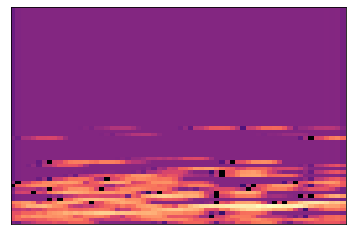

84/84 [==============================] - 16s 190ms/step - loss: 25802.7930 - accuracy: 1.6129e-05


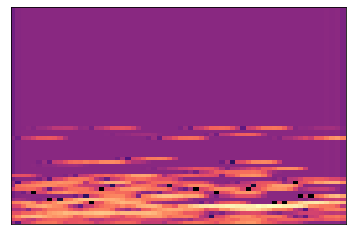

In [12]:
sample_number = 0
inp = (np.reshape(Vxx_r[sample_number, :], (Vxx_r[sample_number, :].shape[0], Vxx_r[sample_number, :].shape[1])))
displaySpectrogram(inp)
plt.show()
for _ in range(10):
    model.fit(Vxx_r, Cxx_r, batch_size=4, epochs=1)
    layerIndex = -1
    func = tf.keras.backend.function([model.get_layer(index=0).input], model.get_layer(index=layerIndex).output)
    layerOutput = func([Vxx_r])  # input_data is a numpy array
    out = (np.reshape(layerOutput[sample_number], (layerOutput[sample_number].shape[0], layerOutput[sample_number].shape[1])))

    displaySpectrogram(out)
    plt.show()

In [13]:
predict_length = 1000

In [16]:
output = model.predict(Vxx_r[:predict_length, :])
output.shape

(333, 512, 64, 1)

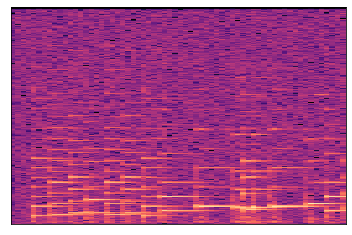

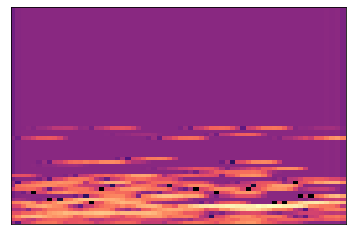

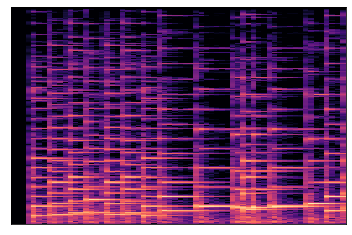

In [23]:
displaySpectrogram(Vxx_r[0, :, :predict_length, 0])
plt.show()
displaySpectrogram(output[0, :, :predict_length, 0])
plt.show()
displaySpectrogram(Cxx_r[0, :, :predict_length, 0])
plt.show()

In [34]:
cleaned_output = istft(output[0, :, :predict_length, 0] + Vxx_i[0, :, :predict_length, 0]*1j, fs=samplerate, nperseg=nperseg)[1]
clean_output = istft(Vxx_r[0, :, :predict_length, 0] + Vxx_i[0, :, :predict_length, 0]*1j, fs=samplerate, nperseg=nperseg)[1]
Audio(clean_output, rate=samplerate)

ValueError: operands could not be broadcast together with shapes (1022,) (1024,) 

In [ ]:
Audio(cleaned_output, rate=samplerate)

It seems that auto encoders are always blurry: therefore, the audio output cannot be precise.